In [102]:
import kneed
from kneed import KneeLocator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from matplotlib.pyplot import figure

In [275]:
csv = pd.read_csv('limited_history_input.csv')
data = csv.to_numpy()

In [104]:
data.shape

(150, 12)

In [47]:
generic_win_per


array([], shape=(0, 1), dtype=float64)

In [276]:
generic_win_per = np.empty((0,1))
cum_win_per = np.empty((0,1))
indexs = np.empty((0,1))

for x in range(len(data[:,0])):
    points_possible = data[x,6] + data[x,7] + data[x,8]
    points_won = data[x,6] + (data[x,7] * 0.5)
    win_perc = (points_won/points_possible) * 100
    index = x
    indexs = np.vstack([indexs,index])
    generic_win_per = np.vstack([generic_win_per,win_perc])
    if x == 0 :
        cum_win_per = generic_win_per
    else:
        cum_win = np.nansum(generic_win_per)/len(generic_win_per)
        cum_win_per = np.vstack([cum_win_per,cum_win])
        
    

all_stats = np.hstack([indexs,data,generic_win_per,cum_win_per])


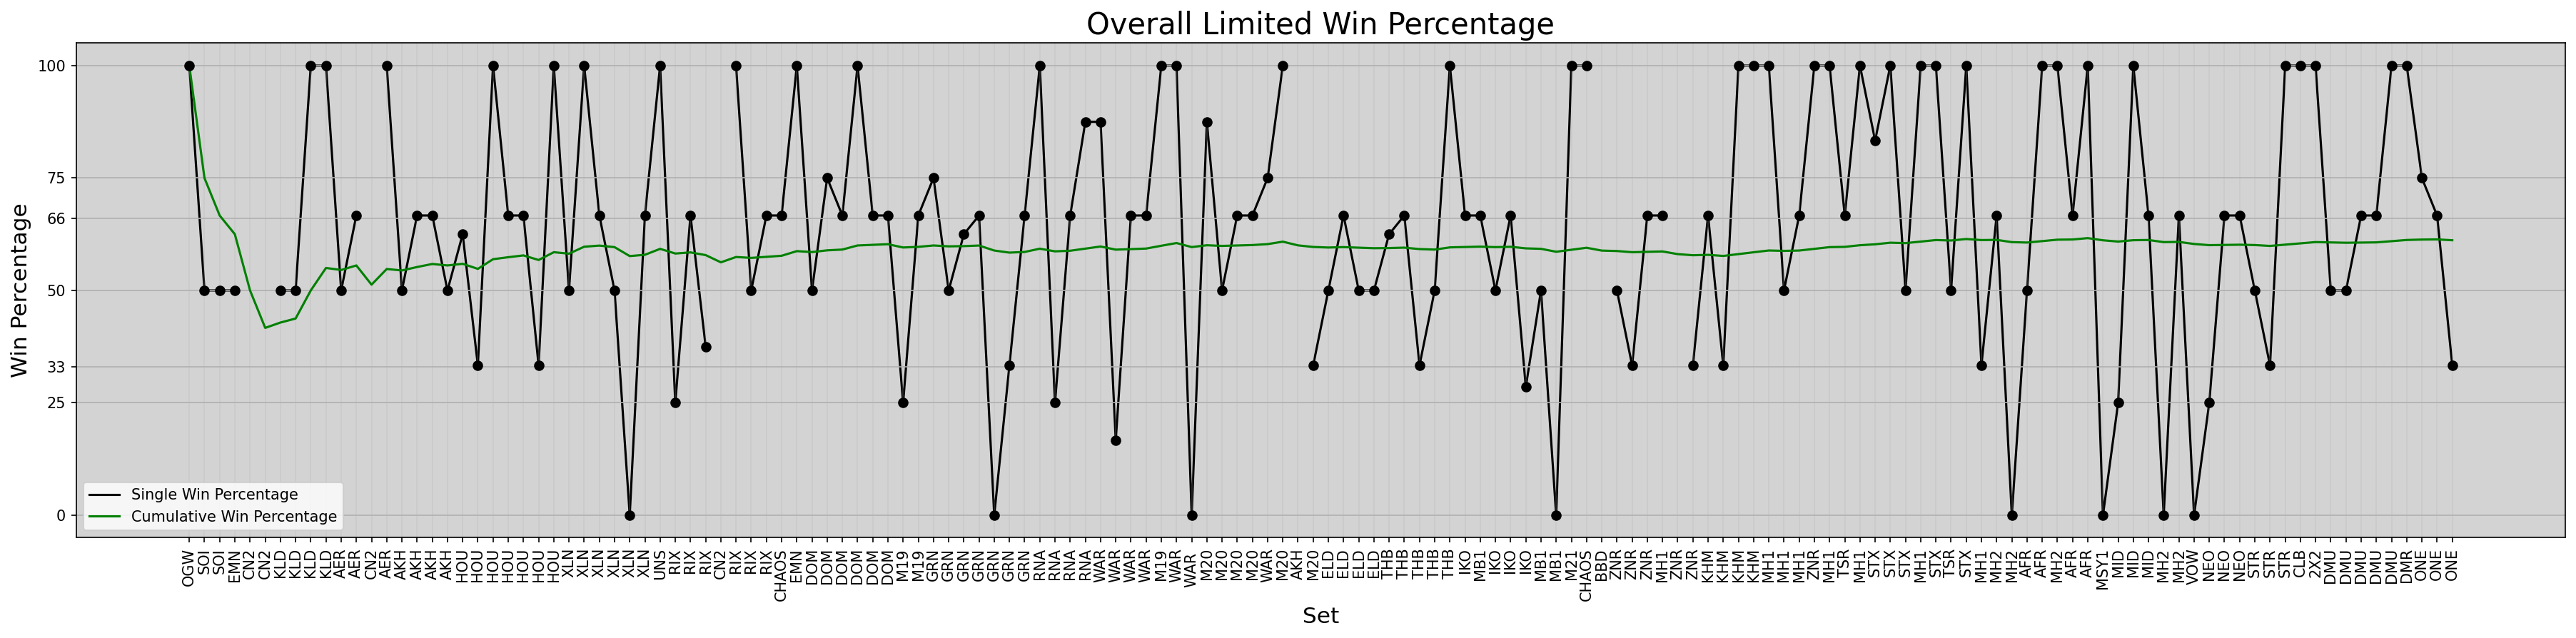

In [228]:
### Plot My Entire Limited History###
figure(figsize=(30, 6), dpi=150)

ax = plt.axes()

ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
plt.plot(all_stats[:,0], all_stats[:,13], color='black', zorder=1)
plt.plot(all_stats[:,0], all_stats[:,14], color='green', zorder=2)
plt.scatter(all_stats[:,0], all_stats[:,13], color='black', zorder=3)
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(range(len(all_stats[:,0])), all_stats[:,2], rotation='vertical')
plt.grid(axis='y', zorder=0)
plt.grid(axis='x', alpha=.25, zorder=0)
plt.title("Overall Limited Win Percentage", fontsize=20)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage'])

plt.show()

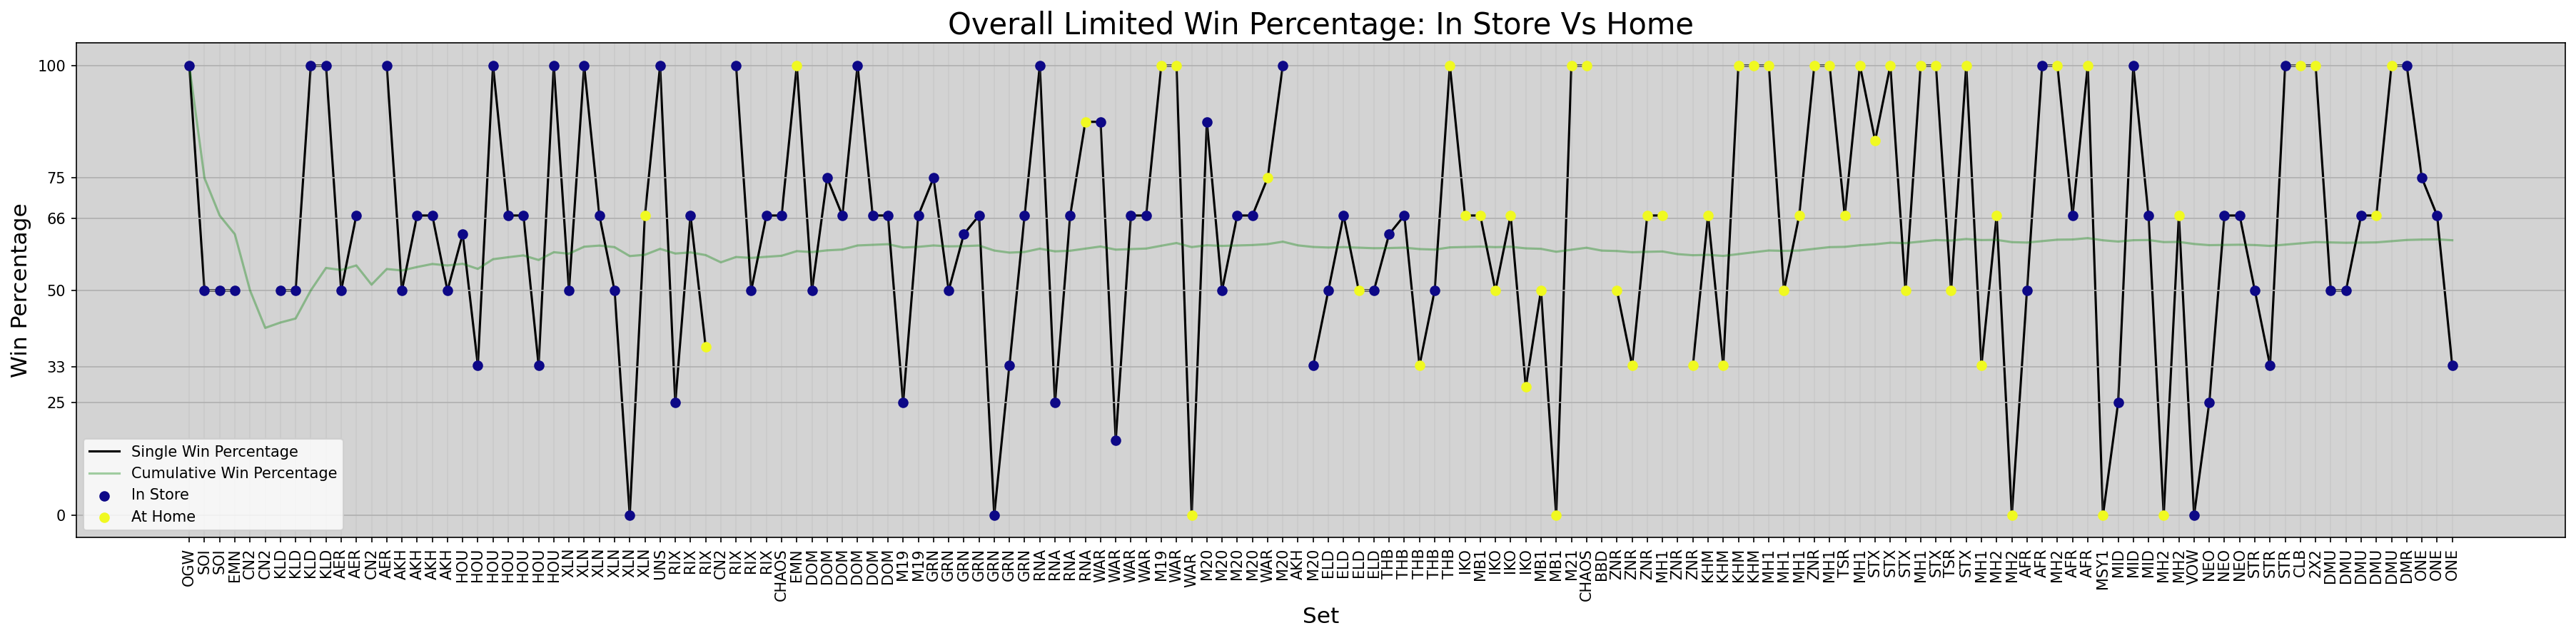

In [244]:
### Plot My Entire Limited History (in store vs at home)###
figure(figsize=(30, 6), dpi=150)
viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 2))

ax = plt.axes()

ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
plt.plot(all_stats[:,0], all_stats[:,13], color='black', zorder=1)
plt.plot(all_stats[:,0], all_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(range(len(all_stats[:,0])), all_stats[:,2], rotation='vertical')
plt.grid(axis='y', zorder=0)
plt.grid(axis='x', alpha=.25, zorder=0)
plt.title("Overall Limited Win Percentage: In Store Vs Home", fontsize=20)
plt.scatter(all_stats[all_stats[:,11] == 'LGS',0], all_stats[all_stats[:,11] == 'LGS',13], color=viridis[0], zorder=3)
plt.scatter(all_stats[all_stats[:,11] == 'Home',0], all_stats[all_stats[:,11] == 'Home',13], color=viridis[1], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage','In Store', 'At Home'])

plt.show()

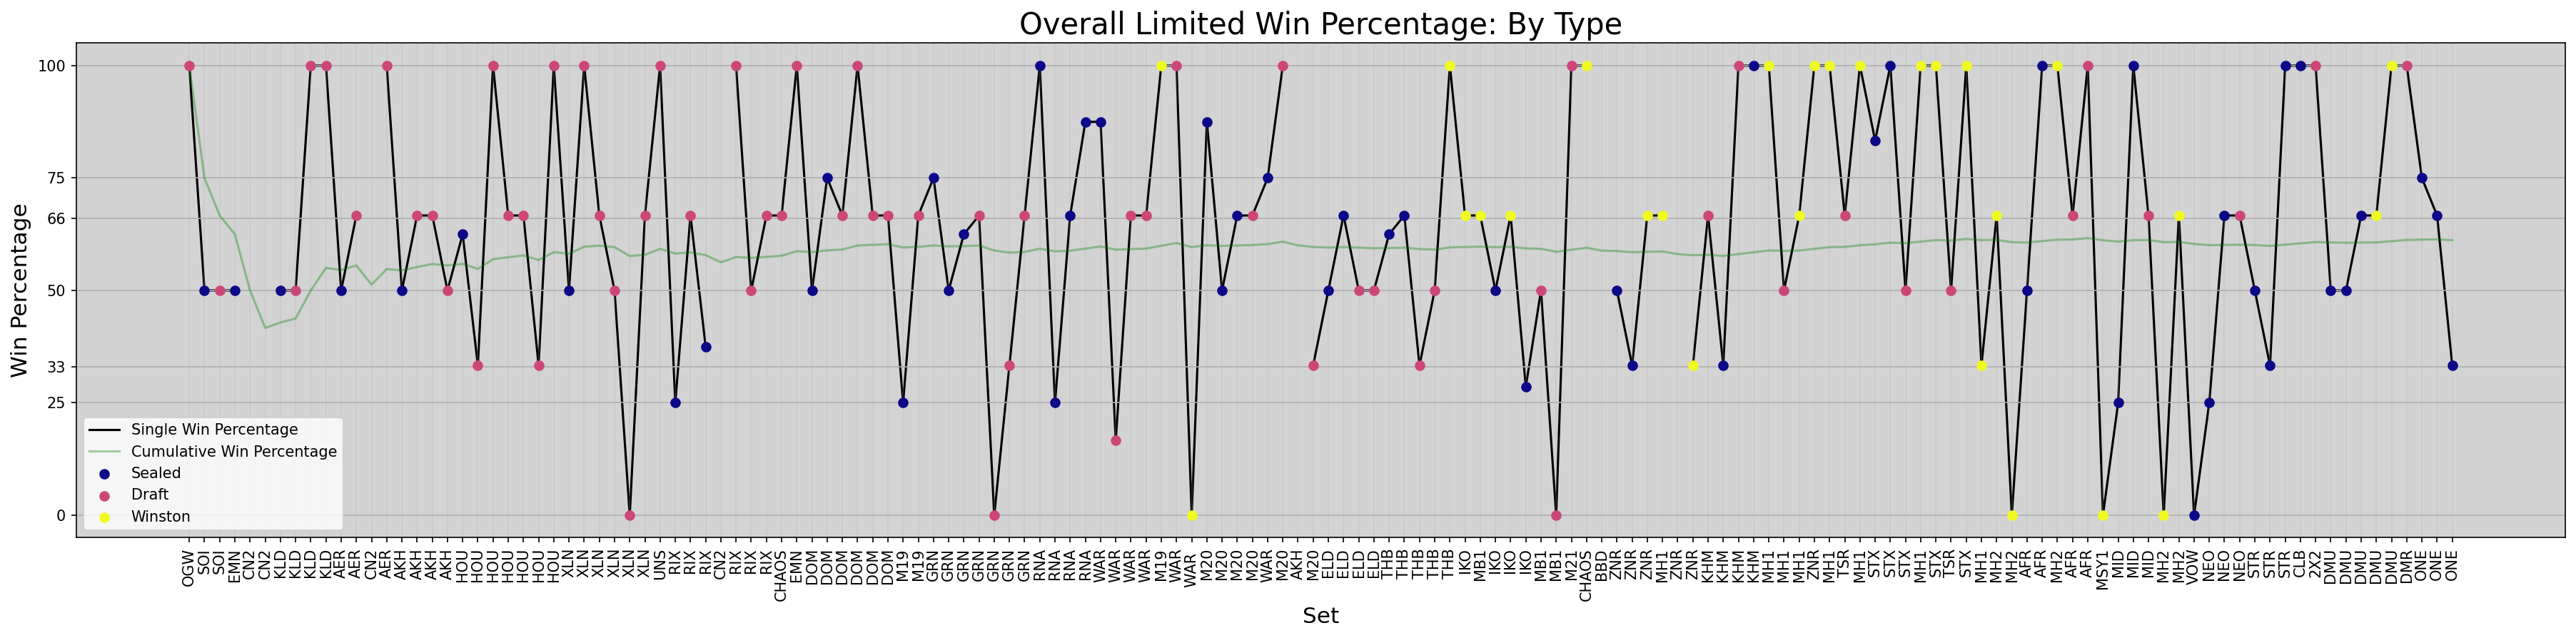

In [243]:
### Plot My Entire Limited History (by type)###
figure(figsize=(30, 6), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 3))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
plt.plot(all_stats[:,0], all_stats[:,13], color='black', zorder=1)
plt.plot(all_stats[:,0], all_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(range(len(all_stats[:,0])), all_stats[:,2], rotation='vertical')
plt.grid(axis='y', zorder=0)
plt.grid(axis='x', alpha=.25, zorder=0)
plt.title("Overall Limited Win Percentage: By Type", fontsize=20)
plt.scatter(all_stats[all_stats[:,10] == 'Sealed',0], all_stats[all_stats[:,10] == 'Sealed',13], color=viridis[0], zorder=3)
plt.scatter(all_stats[all_stats[:,10] == 'Draft',0], all_stats[all_stats[:,10] == 'Draft',13], color=viridis[1], zorder=3)
plt.scatter(all_stats[all_stats[:,10] == 'Winston',0], all_stats[all_stats[:,10] == 'Winston',13], color=viridis[2], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage','Sealed', 'Draft', 'Winston'])

plt.show()

In [245]:
### Generate In Store Data ###
generic_win_per = np.empty((0,1))
cum_win_per = np.empty((0,1))
indexs = np.empty((0,1))

lgs_data = data[data[:,10] == 'LGS', :]

for x in range(len(lgs_data[:,0])):
    points_possible = lgs_data[x,6] + lgs_data[x,7] + lgs_data[x,8]
    points_won = lgs_data[x,6] + (lgs_data[x,7] * 0.5)
    win_perc = (points_won/points_possible) * 100
    index = x
    indexs = np.vstack([indexs,index])
    generic_win_per = np.vstack([generic_win_per,win_perc])
    if x == 0 :
        cum_win_per = generic_win_per
    else:
        cum_win = np.nansum(generic_win_per)/len(generic_win_per)
        cum_win_per = np.vstack([cum_win_per,cum_win])
        
    

lgs_stats = np.hstack([indexs,lgs_data,generic_win_per,cum_win_per])

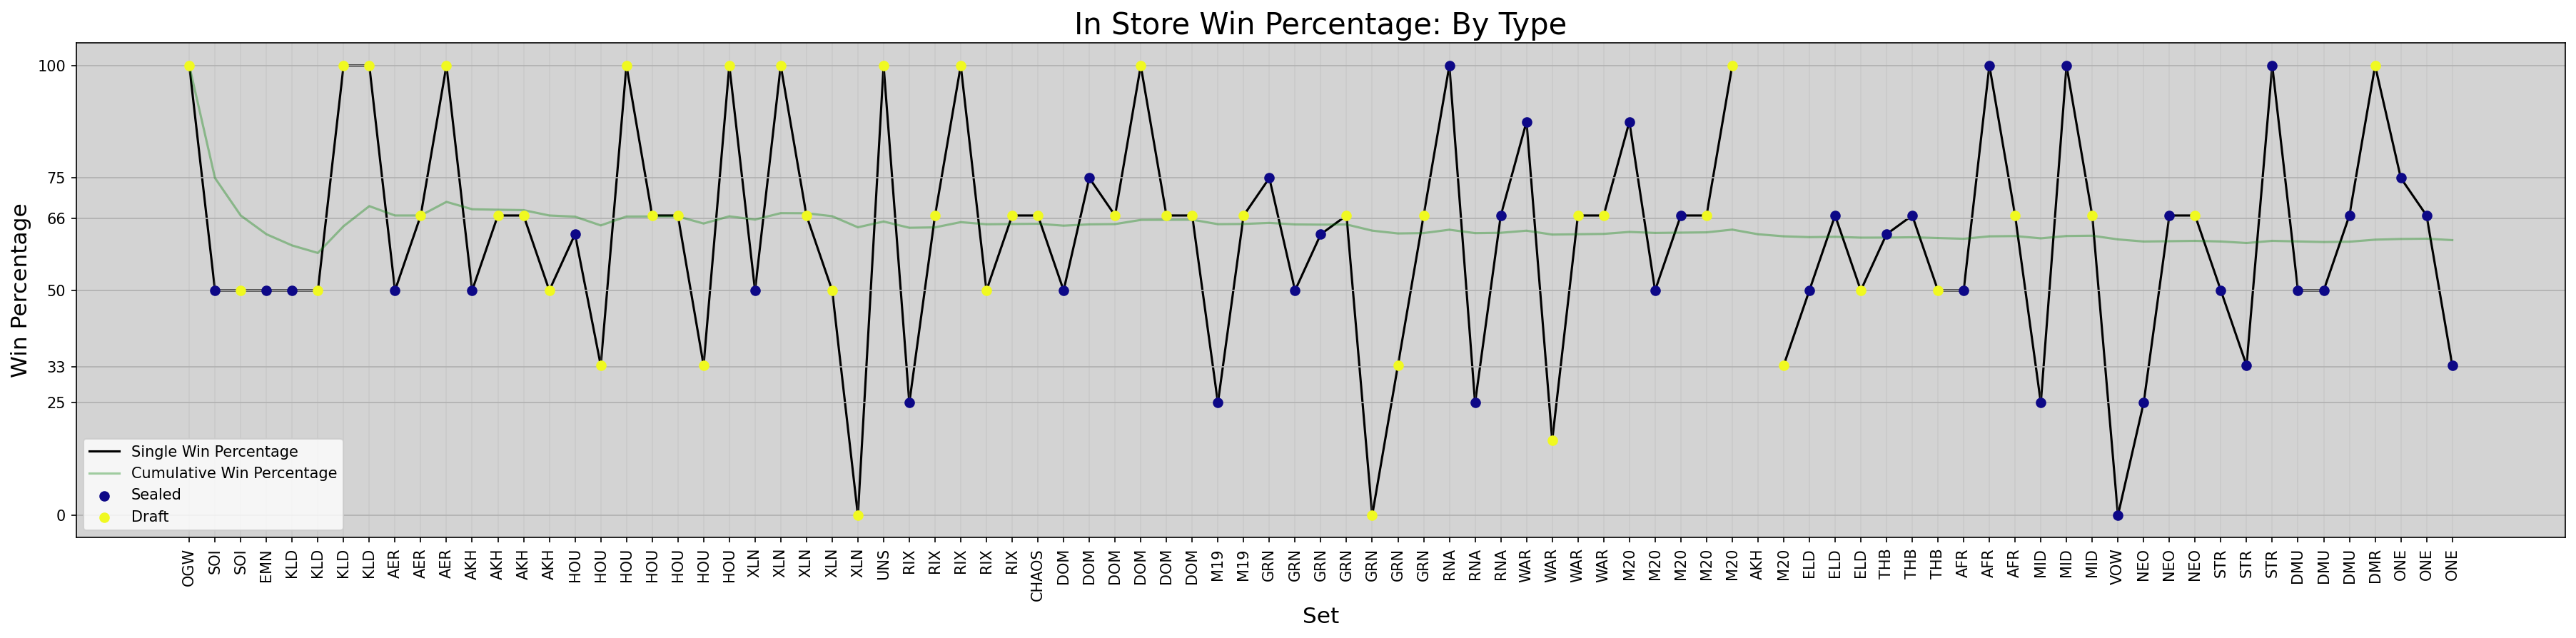

In [255]:
### Plot My LGS Limited History ###
figure(figsize=(30, 6), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 2))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)

plt.plot(lgs_stats[:,0], lgs_stats[:,13], color='black', zorder=1)
plt.plot(lgs_stats[:,0], lgs_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.scatter(lgs_stats[lgs_stats[:,10] == 'Sealed',0], lgs_stats[lgs_stats[:,10] == 'Sealed',13], color=viridis[0], zorder=3)
plt.scatter(lgs_stats[lgs_stats[:,10] == 'Draft',0], lgs_stats[lgs_stats[:,10] == 'Draft',13], color=viridis[1], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage', 'Sealed', 'Draft'])
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(lgs_stats[:,0], lgs_stats[:,2], rotation='vertical')
plt.grid(axis='y')
plt.grid(axis='x', alpha=.25)
plt.title("In Store Win Percentage: By Type", fontsize=20)
plt.show()

In [248]:
### Generate At Home Data ###
generic_win_per = np.empty((0,1))
cum_win_per = np.empty((0,1))
indexs = np.empty((0,1))

home_data = data[data[:,10] == 'Home', :]

for x in range(len(home_data[:,0])):
    points_possible = home_data[x,6] + home_data[x,7] + home_data[x,8]
    points_won = home_data[x,6] + (home_data[x,7] * 0.5)
    win_perc = (points_won/points_possible) * 100
    index = x
    indexs = np.vstack([indexs,index])
    generic_win_per = np.vstack([generic_win_per,win_perc])
    if x == 0 :
        cum_win_per = generic_win_per
    else:
        cum_win = np.nansum(generic_win_per)/len(generic_win_per)
        cum_win_per = np.vstack([cum_win_per,cum_win])
        
    

home_stats = np.hstack([indexs,home_data,generic_win_per,cum_win_per])

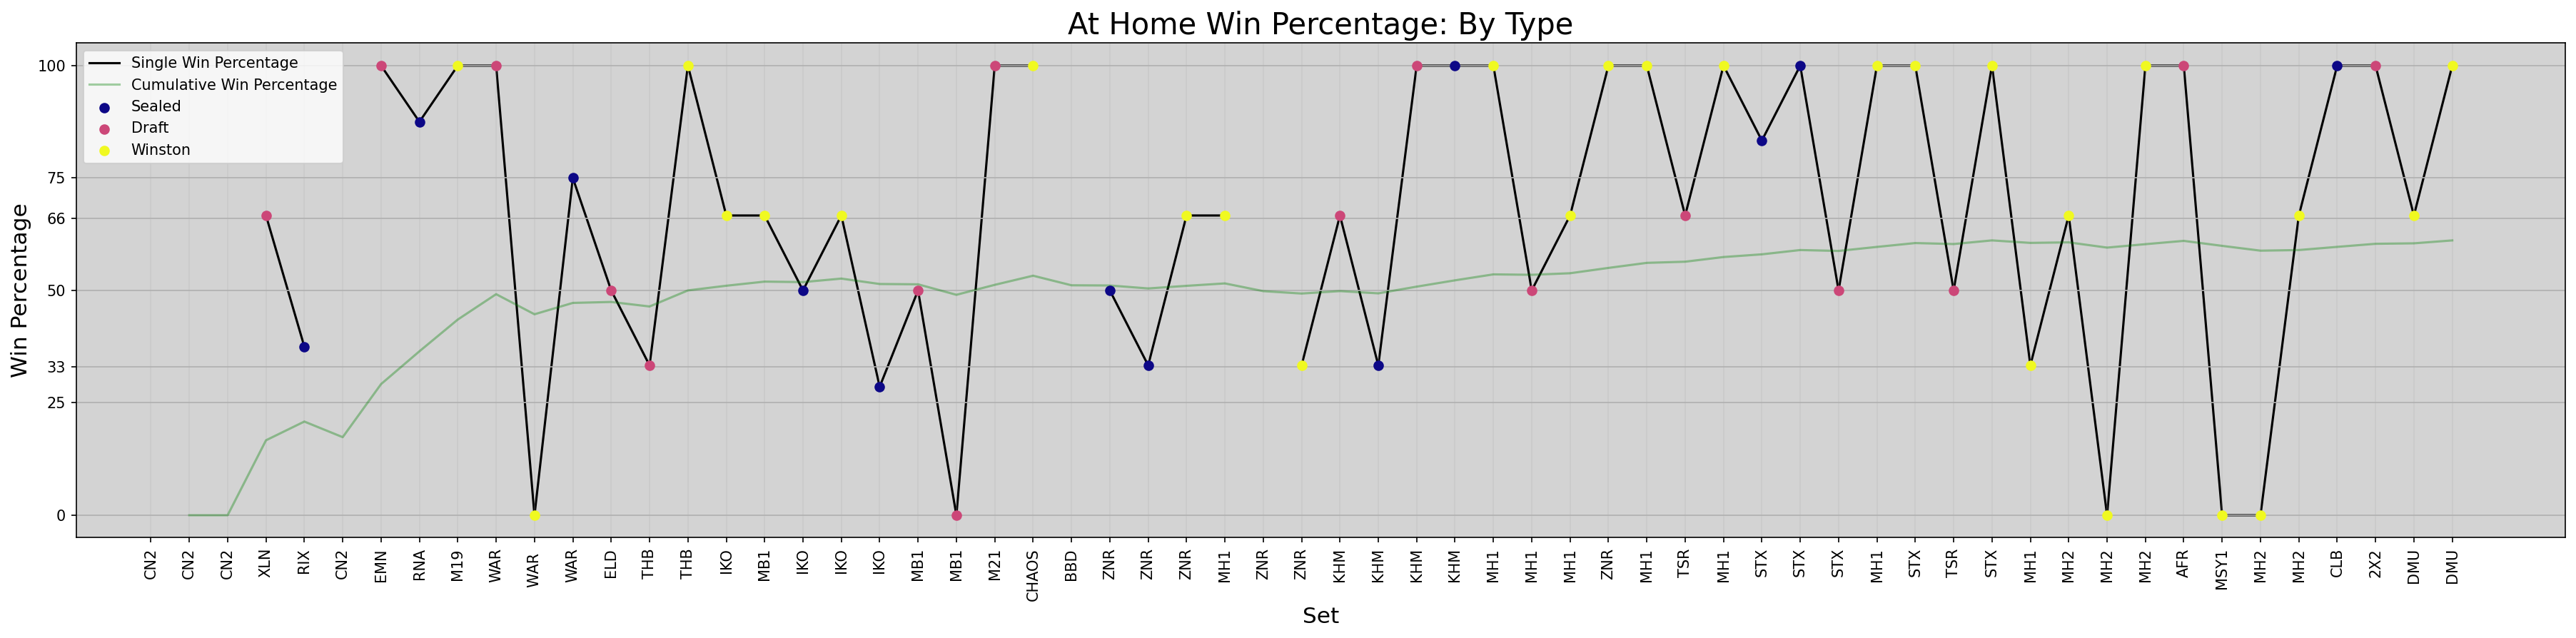

In [256]:
### Plot My At Home Limited History ###
figure(figsize=(30, 6), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 3))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
    
plt.plot(home_stats[:,0], home_stats[:,13], color='black', zorder=1)
plt.plot(home_stats[:,0], home_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.scatter(home_stats[home_stats[:,10] == 'Sealed',0], home_stats[home_stats[:,10] == 'Sealed',13], color=viridis[0], zorder=3)
plt.scatter(home_stats[home_stats[:,10] == 'Draft',0], home_stats[home_stats[:,10] == 'Draft',13], color=viridis[1], zorder=3)
plt.scatter(home_stats[home_stats[:,10] == 'Winston',0], home_stats[home_stats[:,10] == 'Winston',13], color=viridis[2], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage', 'Sealed', 'Draft', 'Winston'])
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(home_stats[:,0], home_stats[:,2], rotation='vertical')
plt.grid(axis='y')
plt.grid(axis='x', alpha=.25)
plt.title("At Home Win Percentage: By Type", fontsize=20)
plt.show()

In [251]:
### Generate Draft Data ###
generic_win_per = np.empty((0,1))
cum_win_per = np.empty((0,1))
indexs = np.empty((0,1))

draft_data = data[data[:,9] == 'Draft', :]

for x in range(len(draft_data[:,0])):
    points_possible = draft_data[x,6] + draft_data[x,7] + draft_data[x,8]
    points_won = draft_data[x,6] + (draft_data[x,7] * 0.5)
    win_perc = (points_won/points_possible) * 100
    index = x
    indexs = np.vstack([indexs,index])
    generic_win_per = np.vstack([generic_win_per,win_perc])
    if x == 0 :
        cum_win_per = generic_win_per
    else:
        cum_win = np.nansum(generic_win_per)/len(generic_win_per)
        cum_win_per = np.vstack([cum_win_per,cum_win])
        
    

draft_stats = np.hstack([indexs,draft_data,generic_win_per,cum_win_per])

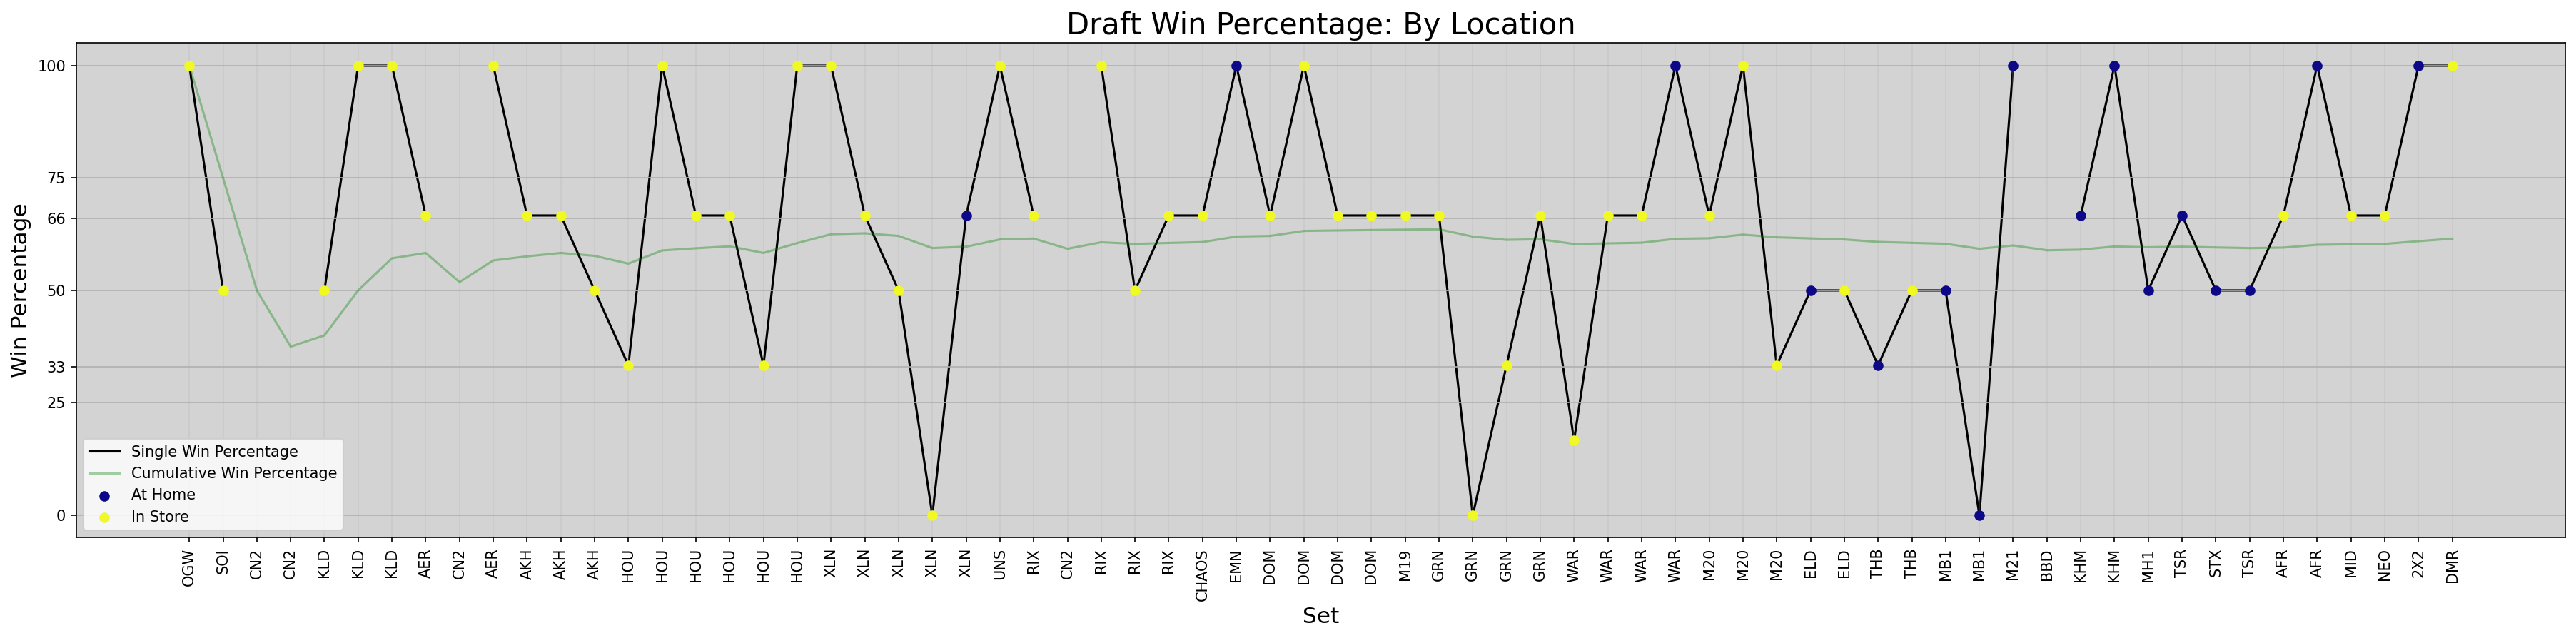

In [257]:
### Plot My Draft Limited History ###
figure(figsize=(30, 6), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 2))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
    
plt.plot(draft_stats[:,0], draft_stats[:,13], color='black', zorder=1)
plt.plot(draft_stats[:,0], draft_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.scatter(draft_stats[draft_stats[:,11] == 'Home',0], draft_stats[draft_stats[:,11] == 'Home',13], color=viridis[0], zorder=3)
plt.scatter(draft_stats[draft_stats[:,11] == 'LGS',0], draft_stats[draft_stats[:,11] == 'LGS',13], color=viridis[1], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage', 'At Home', 'In Store'])
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(draft_stats[:,0], draft_stats[:,2], rotation='vertical')
plt.grid(axis='y')
plt.grid(axis='x', alpha=.25)
plt.title("Draft Win Percentage: By Location", fontsize=20)
plt.show()


In [206]:
### Generate Sealed Data ###
generic_win_per = np.empty((0,1))
cum_win_per = np.empty((0,1))
indexs = np.empty((0,1))

sealed_data = data[data[:,9] == 'Sealed', :]

for x in range(len(sealed_data[:,0])):
    points_possible = sealed_data[x,6] + sealed_data[x,7] + sealed_data[x,8]
    points_won = sealed_data[x,6] + (sealed_data[x,7] * 0.5)
    win_perc = (points_won/points_possible) * 100
    index = x
    indexs = np.vstack([indexs,index])
    generic_win_per = np.vstack([generic_win_per,win_perc])
    if x == 0 :
        cum_win_per = generic_win_per
    else:
        cum_win = np.nansum(generic_win_per)/len(generic_win_per)
        cum_win_per = np.vstack([cum_win_per,cum_win])
        
    

sealed_stats = np.hstack([indexs,sealed_data,generic_win_per,cum_win_per])

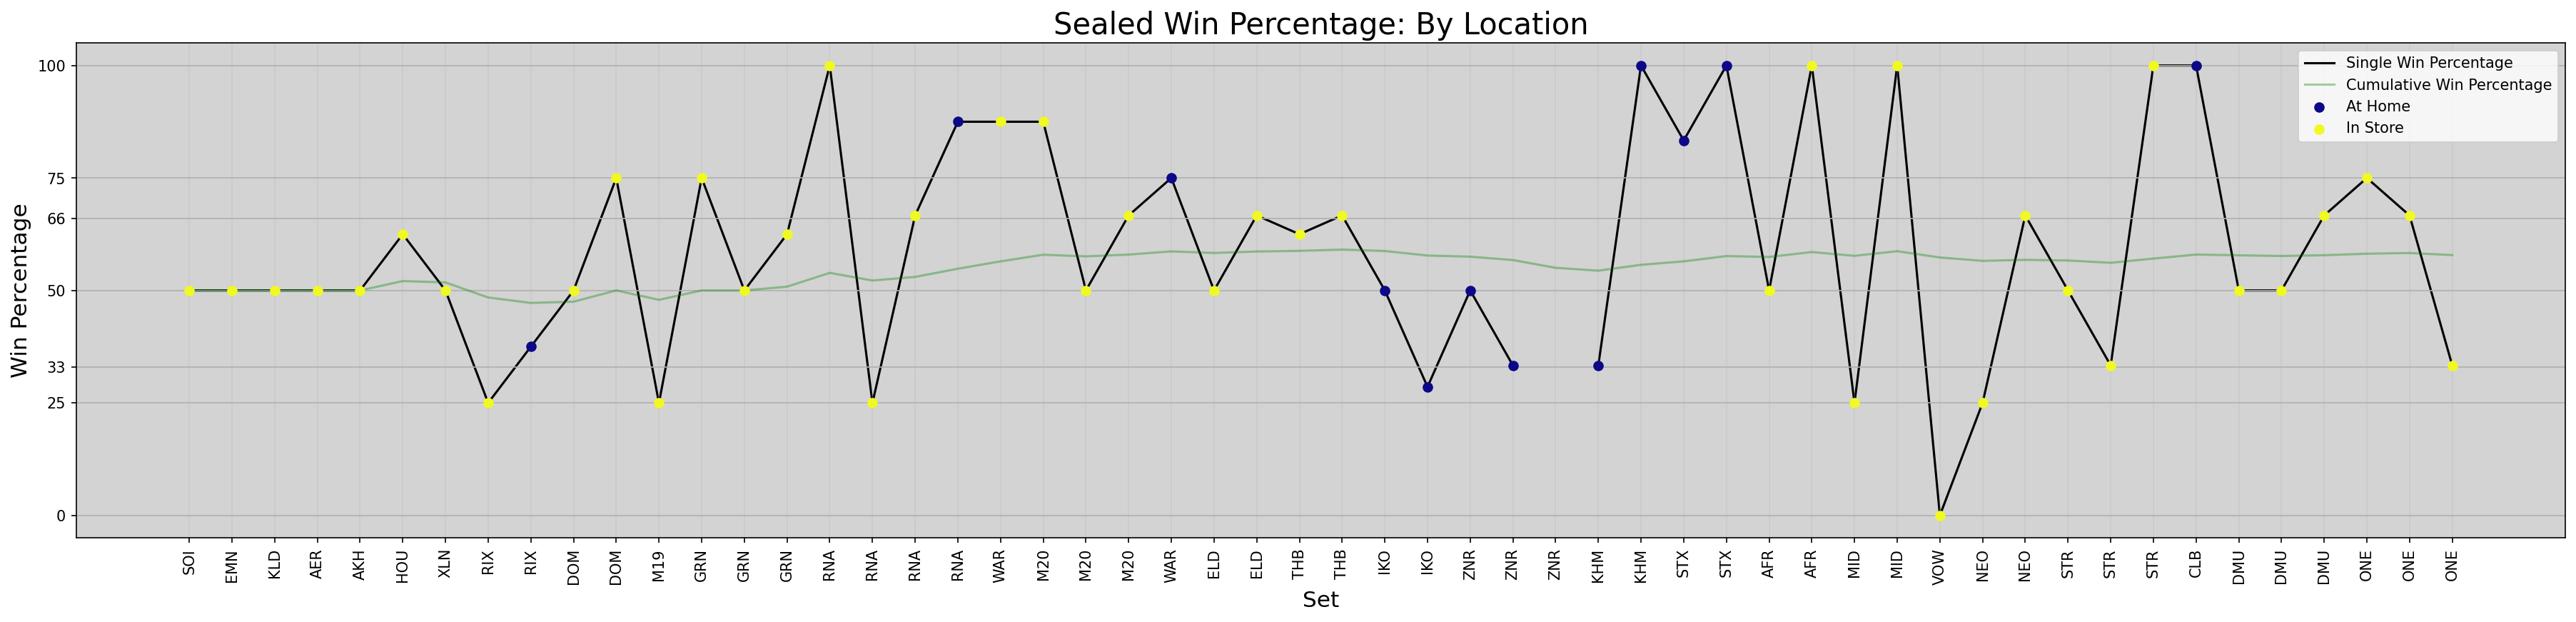

In [258]:
### Plot My Sealed Limited History ###
figure(figsize=(30, 6), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 2))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)
    
plt.plot(sealed_stats[:,0], sealed_stats[:,13], color='black', zorder=1)
plt.plot(sealed_stats[:,0], sealed_stats[:,14], color='green', zorder=2, alpha=0.35)
plt.scatter(sealed_stats[sealed_stats[:,11] == 'Home',0], sealed_stats[sealed_stats[:,11] == 'Home',13], color=viridis[0], zorder=3)
plt.scatter(sealed_stats[sealed_stats[:,11] == 'LGS',0], sealed_stats[sealed_stats[:,11] == 'LGS',13], color=viridis[1], zorder=3)
plt.legend(['Single Win Percentage', 'Cumulative Win Percentage', 'At Home', 'In Store'])
plt.xlabel("Set", fontsize=15)
plt.ylabel("Win Percentage", fontsize=15)
plt.yticks([0,25,33,50,66,75,100], ['0','25','33','50','66','75','100'])
plt.xticks(sealed_stats[:,0], sealed_stats[:,2], rotation='vertical')
plt.grid(axis='y')
plt.grid(axis='x', alpha=.25)
plt.title("Sealed Win Percentage: By Location", fontsize=20)
plt.show()

In [367]:
### Generate Count Data for Histograms ###
sets = np.empty((0,1))
draft_counts = np.empty((0,1))
sealed_counts = np.empty((0,1))
winston_counts = np.empty((0,1))
home_counts = np.empty((0,1))
store_counts = np.empty((0,1))
all_counts = np.empty((0,1))
orders = np.empty((0,1))
counts = np.empty((0,1))

for x in np.unique(all_stats[:,2]):

    order = int(np.min(all_stats[all_stats[:,2] == x, 0]))
    set = str(x)
    count = len(all_stats[all_stats[:,2] == x, 0])

    set_count = all_stats[all_stats[:,2] == x, :]

    winston_count = int(len(set_count[set_count[:,10] == 'Winston', 0]))
    sealed_count = int(len(set_count[set_count[:,10] == 'Sealed', 0]))
    draft_count = int(len(set_count[set_count[:,10] == 'Draft', 0]))
    home_count = int(len(set_count[set_count[:,11] == 'Home', 0]))
    store_count = int(len(set_count[set_count[:,11] == 'LGS', 0]))

    sets = np.vstack([sets,set])
    counts = np.vstack([counts,count])
    orders = np.vstack([orders,order])
    winston_counts = np.vstack([winston_counts,winston_count])
    sealed_counts = np.vstack([sealed_counts,sealed_count])
    draft_counts = np.vstack([draft_counts,draft_count])
    home_counts = np.vstack([home_counts,home_count])
    store_counts = np.vstack([store_counts,store_count])


set_counts = np.concatenate([orders,sets,winston_counts,sealed_counts,draft_counts,counts,store_counts,home_counts], axis=1)
set_counts = set_counts[set_counts[:, 0].astype(np.float).argsort()]

C:\Users\KellyO'Neill\AppData\Local\Temp\ipykernel_24560\2009103926.py:37: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  set_counts = set_counts[set_counts[:, 0].astype(np.float).argsort()]


In [370]:
set_counts

array([['0.0', 'OGW', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0'],
       ['1.0', 'SOI', '0.0', '1.0', '1.0', '2.0', '2.0', '0.0'],
       ['3.0', 'EMN', '0.0', '1.0', '1.0', '2.0', '1.0', '1.0'],
       ['4.0', 'CN2', '0.0', '0.0', '4.0', '4.0', '0.0', '4.0'],
       ['6.0', 'KLD', '0.0', '1.0', '3.0', '4.0', '4.0', '0.0'],
       ['10.0', 'AER', '0.0', '1.0', '2.0', '3.0', '3.0', '0.0'],
       ['14.0', 'AKH', '1.0', '1.0', '3.0', '5.0', '5.0', '0.0'],
       ['18.0', 'HOU', '0.0', '1.0', '6.0', '7.0', '7.0', '0.0'],
       ['25.0', 'XLN', '0.0', '1.0', '5.0', '6.0', '5.0', '1.0'],
       ['31.0', 'UNS', '0.0', '0.0', '1.0', '1.0', '1.0', '0.0'],
       ['32.0', 'RIX', '0.0', '2.0', '4.0', '6.0', '5.0', '1.0'],
       ['39.0', 'CHAOS', '1.0', '0.0', '1.0', '2.0', '1.0', '1.0'],
       ['41.0', 'DOM', '0.0', '2.0', '4.0', '6.0', '6.0', '0.0'],
       ['47.0', 'M19', '1.0', '1.0', '1.0', '3.0', '2.0', '1.0'],
       ['49.0', 'GRN', '0.0', '3.0', '4.0', '7.0', '7.0', '0.0'],
       ['56.0

Text(0.5, 1.0, 'All Sets Played: By Play Type')

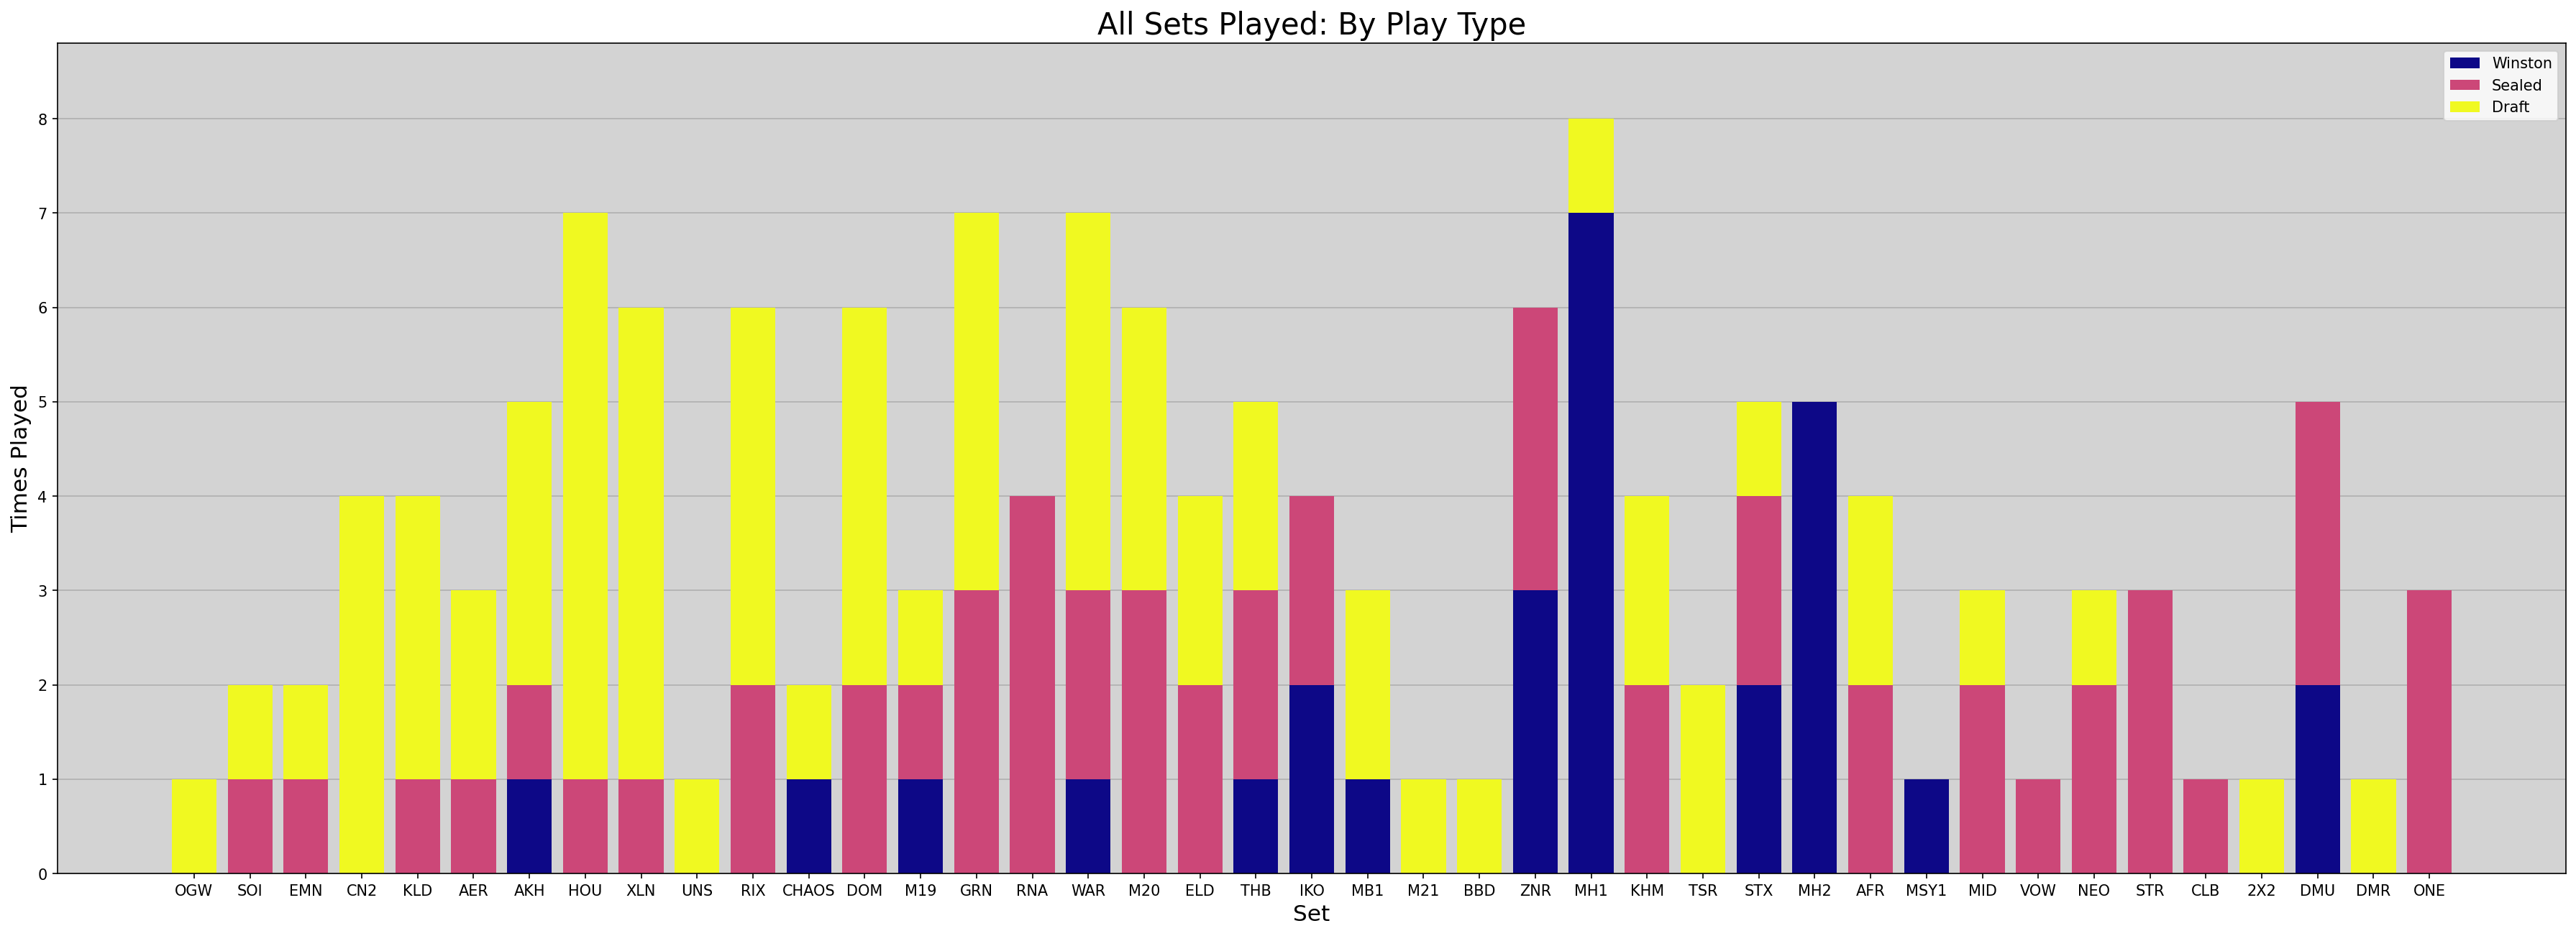

In [375]:
### Plot Histogram of Sets by Play Type ###
figure(figsize=(30, 10), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 3))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)

plt.grid(axis='y')
plt.bar(set_counts[:,1], set_counts[:,2].astype(float), color=viridis[0], zorder=2)
plt.bar(set_counts[:,1], set_counts[:,3].astype(float), color=viridis[1], bottom = set_counts[:,2].astype(float), zorder=2)
plt.bar(set_counts[:,1], set_counts[:,4].astype(float), color=viridis[2], bottom = (set_counts[:,3].astype(float) + set_counts[:,2].astype(float)), zorder=2)
plt.ylim(0, np.max(set_counts[:,5].astype(float)) * 1.1)
plt.legend(['Winston', 'Sealed', 'Draft'])
plt.ylabel('Times Played', fontsize=15)
plt.xlabel('Set', fontsize=15)
plt.title("All Sets Played: By Play Type", fontsize=20)


Text(0.5, 1.0, 'All Sets Played: By Location')

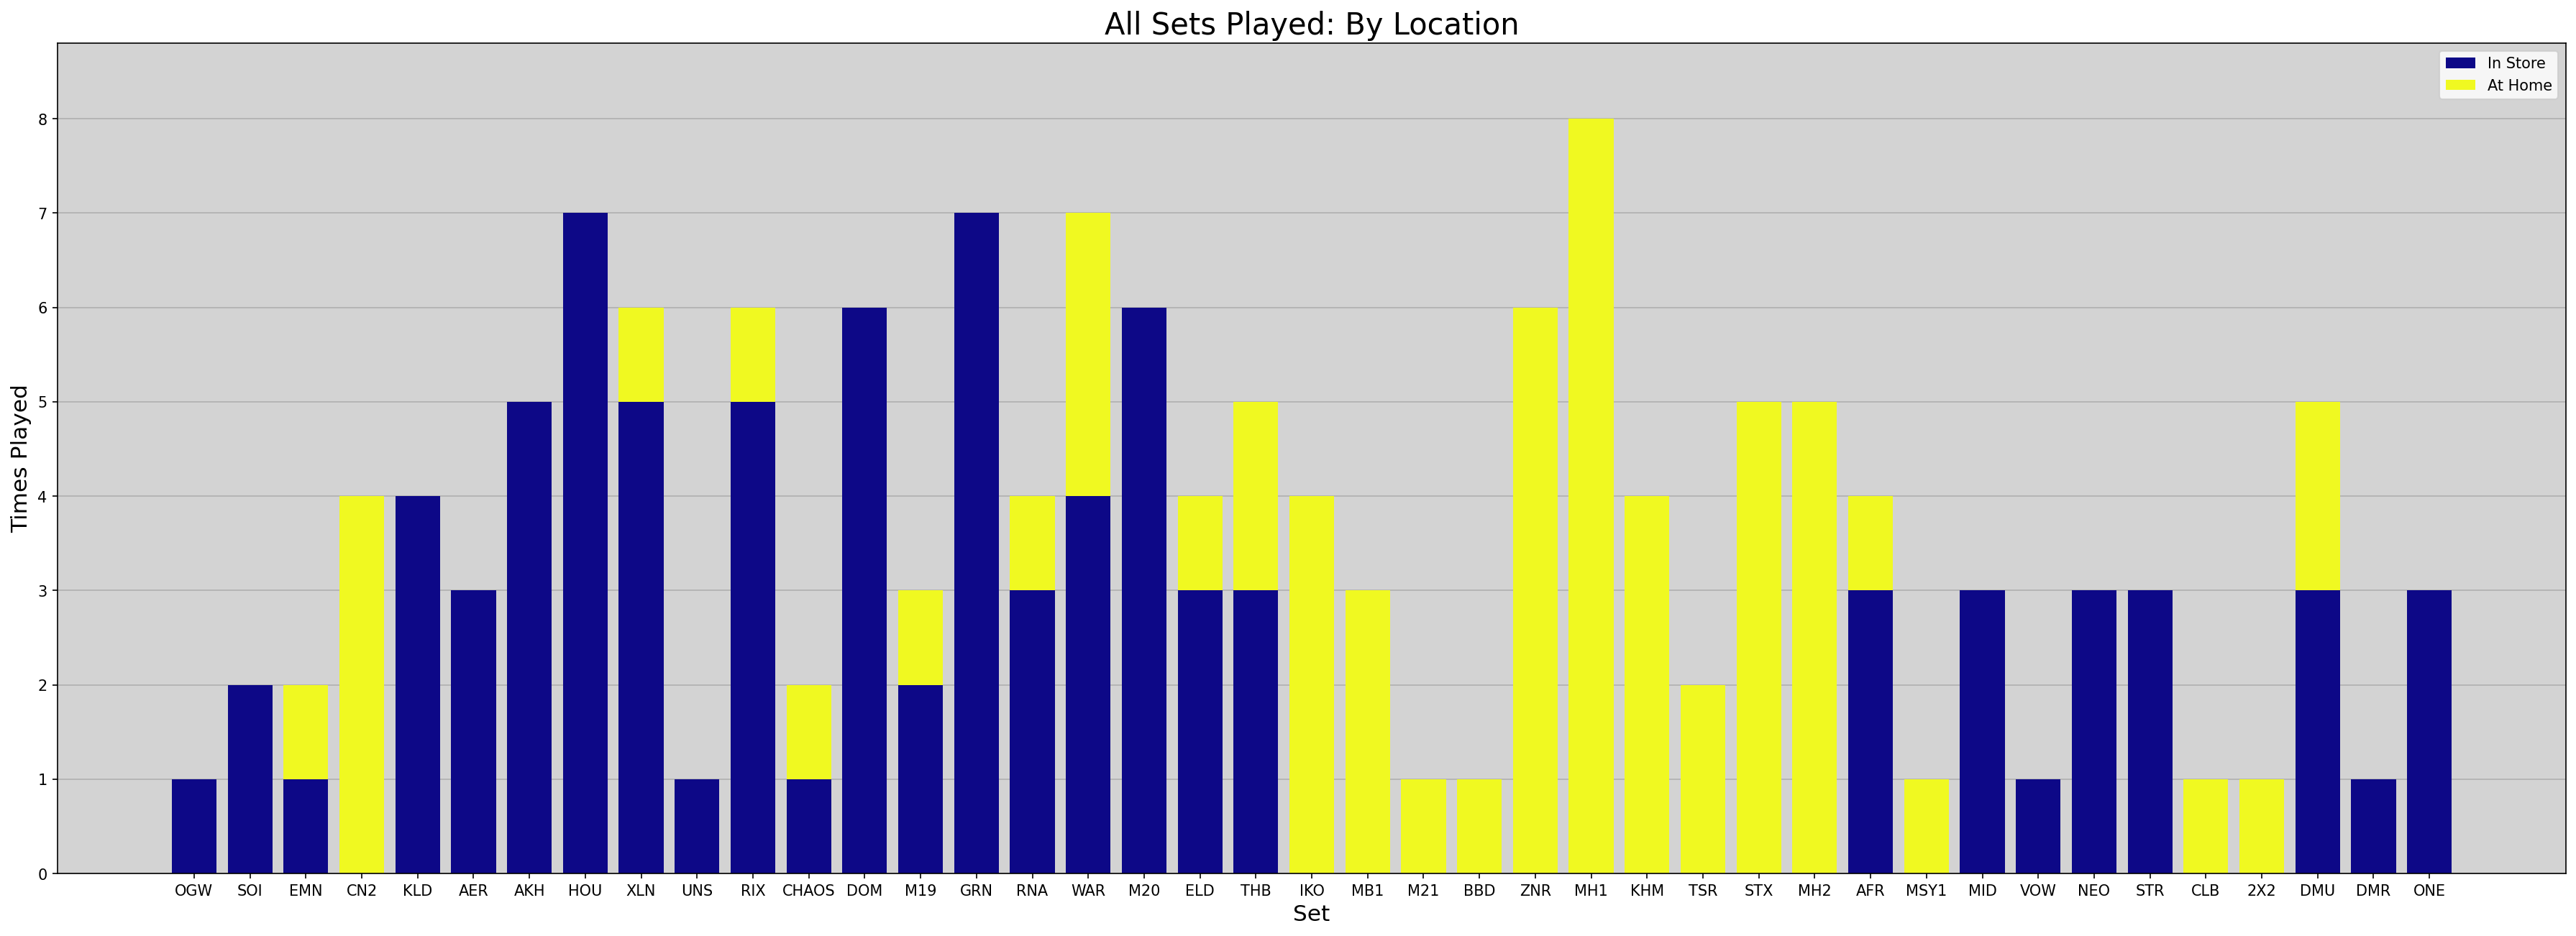

In [376]:
### Plot Histogram of Sets by Location ###
figure(figsize=(30, 10), dpi=150)

viridis = mpl.colormaps['plasma']
viridis = viridis(np.linspace(0, 1, 2))

ax = plt.axes()
ax.set_facecolor('lightgrey')
ax.set_alpha(0.1)

plt.grid(axis='y')
plt.bar(set_counts[:,1], set_counts[:,6].astype(float), color=viridis[0], zorder=2)
plt.bar(set_counts[:,1], set_counts[:,7].astype(float), color=viridis[1], bottom = set_counts[:,6].astype(float), zorder=2)
plt.ylim(0, np.max(set_counts[:,5].astype(float)) * 1.1)
plt.legend(['In Store', 'At Home'])
plt.ylabel('Times Played', fontsize=15)
plt.xlabel('Set', fontsize=15)
plt.title("All Sets Played: By Location", fontsize=20)
